In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import norm

sns.set_style("darkgrid")

## Часть I: О теореме Байеса

Введём обозначения для дальнейшего решения задания:

Пусть V - вероятность того, что человек виновен;

K - редкая группа крови;

$\ \alpha$ = 0.01 - часть людей с редкой группой крови;

N = 1000000 - число жителей

1. Ошибка прокурора заключается в том, что он оценил вероятность того, что подсудимый имеет редкую группу крови при условии его невиновности $\ P(K | \overline{V}) = \alpha$ и дальнейший вывод о вероятности вины равной $ 1 - \alpha $, но такая оценка не даёт сделать вывод о вероятности виновности подсудимого, имеющего редкую группу крови. То есть правильнее будет найти значение: $\ P(V | K).$

2. Адвокат сформулировал вероятность выбрать случайного человека редкой крови среди всех как: $ p = \dfrac{1}{N * \alpha} $.
Такая формулировка подразумевает, что виновность или невиновность человека $P(V)$ не зависит от группы крови и этот результат можно было считать априорным, но основная задача заключалась в вычислении $\ P(V | K)$.

3. Введём обозначения для дальнейшего решения задания:

$d = \mathbb{1}[$человек болен$], \quad t = \mathbb{1}[$тест положительный$].$

$e_1 = P(t = 1 | d = 0)$ - ошибка 1-го рода

$e_2 = P(t = 0 | d = 1)$ - ошибка 2-го рода

$\delta = P(d = 1)$ - часть людей с заболеванием (априорная вероятность заболевания).

Цель состоит в том, чтобы уточнить вывод о сокращении ошибок (ошибки 1-го и 2-го изменяются независимо) на апостериорных вероятностях заболевания. Нам известно, что количество ложноположительных и ложноотрицательных результатов соответствует ошибке 1-го типа и ошибке 2-го типа соответственно.

$P(d = 1 | t = 0) = \dfrac{P(d = 1, t = 0)}{P(t = 0)} = \dfrac{P(t = 0 | d = 1) P(d = 1)}{P(t = 0 | d = 0) P(d = 0) + P(t = 0 | d = 1) P(d = 1)}.$

$P(d = 1 | t = 1) = \dfrac{P(d = 1, t = 1)}{P(t = 1)} = \dfrac{P(t = 1 | d = 1) P(d = 1)}{P(t = 1 | d = 0) P(d = 0) + P(t = 1 | d = 1) P(d = 1)}.$


Если подставить соответствующие соотношения:

$P(d = 1 | t = 0) = \dfrac{e_2 \delta}{(1 - e_1) (1 - \delta) + e_2 \delta}.$

$P(d = 1 | t = 1) = \dfrac{(1 - e_2) \delta}{e_1 (1 - \delta) + (1 - e_2) \delta}.$


In [3]:
# болеет
value = 0.01
# вероятность ошибки
error = 0.05
x = np.arange(0, 0.05, 0.001)

def posterior_positive_test(e1, e2, value=value):
    return (1 - e2) * value / (e1 * (1 - value) + (1 - e2) * value)

def posterior_negative_test(e1, e2, value=value):
    return e2 * value / ((1 - e1) * (1 - value) + e2 * value)

Апостериорные вероятности болезни при положительном тесте:

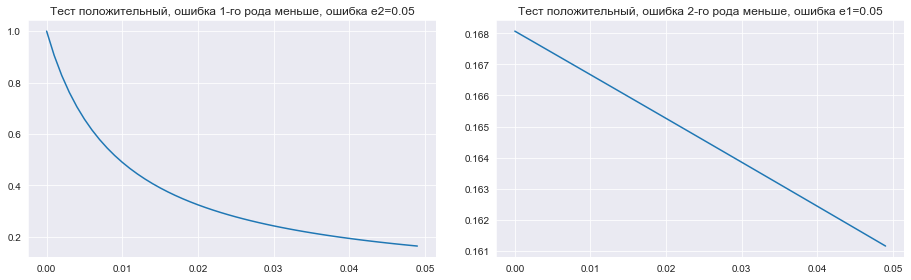

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))
ax[0].plot(x, posterior_positive_test(e1=x, e2=error))
ax[0].set_title("Тест положительный, ошибка 1-го рода меньше, ошибка e2=0.05")

ax[1].plot(x, posterior_positive_test(e1=error, e2=x))
ax[1].set_title("Тест положительный, ошибка 2-го рода меньше, ошибка e1=0.05")
fig.tight_layout();

Апостериорные вероятности болезни при отрицательном тесте:

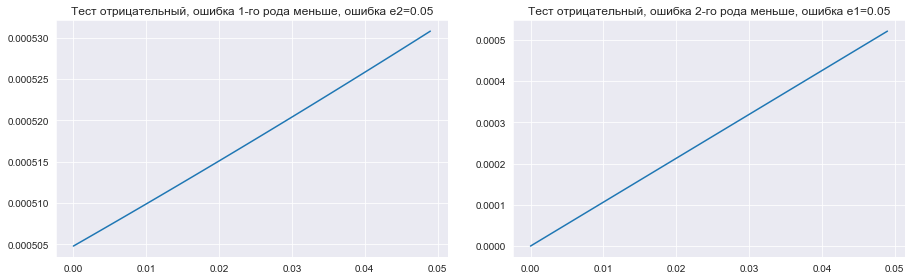

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(13,4))
ax[0].plot(x, posterior_negative_test(e1=x, e2=error))
ax[0].set_title("Тест отрицательный, ошибка 1-го рода меньше, ошибка e2=0.05")

ax[1].plot(x, posterior_negative_test(e1=error, e2=x))
ax[1].set_title("Тест отрицательный, ошибка 2-го рода меньше, ошибка e1=0.05")
fig.tight_layout();

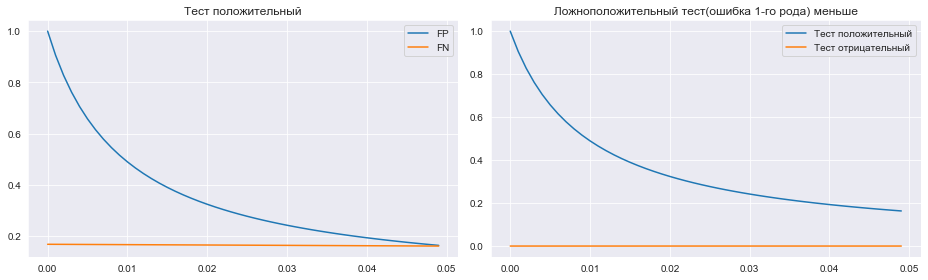

In [6]:
x = np.arange(0, 0.05, 0.001)

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

l1, = ax[0].plot(x, posterior_positive_test(e1=x, e2=error))
l2, = ax[0].plot(x, posterior_positive_test(e1=error, e2=x))
ax[0].set_title("Тест положительный")
ax[0].legend([l1, l2], ['FP', 'FN'])

l1, = ax[1].plot(x, posterior_positive_test(e1=x, e2=error))
l2, = ax[1].plot(x, posterior_negative_test(e1=x, e2=error))
ax[1].set_title("Ложноположительный тест(ошибка 1-го рода) меньше")
ax[1].legend([l1, l2], ['Тест положительный', 'Тест отрицательный'])
fig.tight_layout();

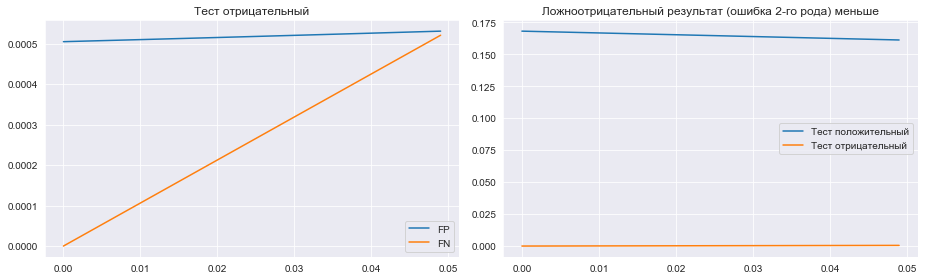

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(13, 4))

l1, = ax[0].plot(x, posterior_negative_test(e1=x, e2=error))
l2, = ax[0].plot(x, posterior_negative_test(e1=error, e2=x))
ax[0].set_title("Тест отрицательный")
ax[0].legend([l1, l2], ['FP', 'FN'])

l1, = ax[1].plot(x, posterior_positive_test(e1=error, e2=x))
l2, = ax[1].plot(x, posterior_negative_test(e1=error, e2=x))
ax[1].set_title("Ложноотрицательный результат (ошибка 2-го рода) меньше")
ax[1].legend([l1, l2], ['Тест положительный', 'Тест отрицательный'])
fig.tight_layout();

В случае отрицательного теста вероятность заболевания уже мала (0.0005), однако по своей природе она должна быть небольшой. Если врачи заинтересованы в уменьшении апостериорной вероятности заболевания при отрицательном результате теста до нуля, они должны уменьшить количество ложноположительных результатов.

На мой взгляд, наиболее влиятельный эффект наблюдается в том случае, если у человека положительный тест и врачи уменьшили количество ложноотрицательных результатов (в этом случае апостериорная вероятность заболевания увеличилась с 0.2 до 1.0).


Во всяком случае у нас есть компромисс:

если нам нужна апостериорная вероятность заболевания при отрицательном тесте $ P (d = 1 | t = 0) \rightarrow 0 $, тогда нам необходимо FP $ \rightarrow 0 $

если нам нужна апостериорная вероятность заболевания при положительном тесте $ P (d = 1 | t = 1) \rightarrow 1 $, тогда нам необходимо FN $ \rightarrow 0 $


## Часть 2: О линейной регрессии

Загрузим и посмотрим данные с нужной даты (3 марта) для России:

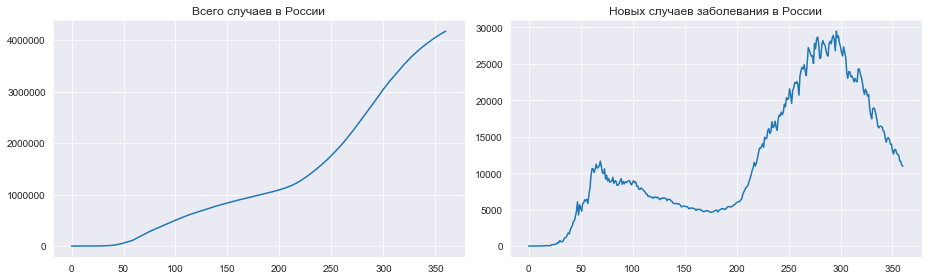

In [8]:
data = pd.read_csv('owid-covid-data.csv')

data = data[['date', 'location', 'total_cases', 'new_cases']].dropna()
data['date'] = pd.to_datetime(data['date'])

FROM_DATE = '2020-03-03'
data = data[(data['date'] >= FROM_DATE) & (data['location'] == 'Russia')].reset_index()

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
ax[0].plot(data['total_cases'].values)
ax[0].set_title("Всего случаев в России")

ax[1].plot(data['new_cases'].values)
ax[1].set_title("Новых случаев заболевания в России");
fig.tight_layout();

Модель с экспоненциальным ростом числа заболевших:

Линейная модель: $\ \log(y) = b + w x$

$x$ - число дней

$y$ - всего (или новых) случаев заболевания

In [9]:
# Ключевые даты и размер обучающей выборки
TRAIN_SIZE = 50
KEY_DATES = ['2020-05-01', '2020-06-01', '2020-09-01']
OFFSETS = [pd.date_range(FROM_DATE, date, freq='1d').shape[0] - 1 for date in KEY_DATES]

In [10]:
total_train = data['total_cases'][:TRAIN_SIZE].values
new_train = data['new_cases'].replace(0, 1)[:TRAIN_SIZE].values
x_train = np.arange(TRAIN_SIZE).reshape(-1, 1)

Предсказание количества случаев заболевания экспоненциальной моделью:

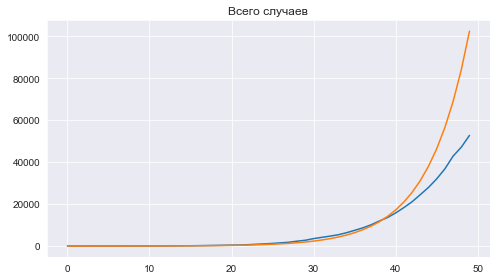

In [11]:
total_cases = data.loc[data['date'] <= KEY_DATES[-1]]['total_cases'].values

model_total = LinearRegression()
model_total.fit(x_train, np.log(total_train))

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(total_train)
ax.plot(np.exp(model_total.predict(x_train)))
ax.set_title("Всего случаев")
fig.tight_layout();

Предсказание новых случаев заболевания экспоненциальной моделью:

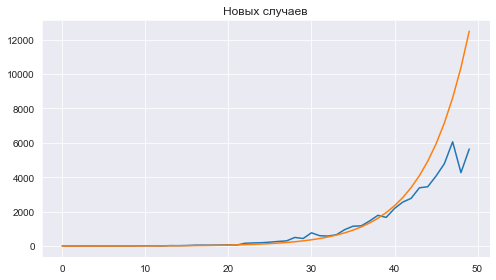

In [12]:
new_cases = data.loc[data['date'] <= KEY_DATES[-1]]['new_cases'].replace(0, 1).values
model_new = LinearRegression()
model_new.fit(x_train, np.log(new_train));

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(new_train)
ax.plot(np.exp(model_new.predict(x_train)))
ax.set_title("Новых случаев");
fig.tight_layout();

In [13]:
total = np.std(np.log(total_train) - model_total.predict(x_train))
new = np.std(np.log(new_train) - model_new.predict(x_train))
print(f'Стандартное отклонение:\nВсего случаев: {total}\nНовых случаев: {new}')

Стандартное отклонение:
Всего случаев: 0.3490422059635658
Новых случаев: 0.5960780559466519



При условии нормального априорного распределения и нормальности данных (за счет использования линейной регрессии) мы можем гарантировать нормальность апостериорного распределения параметров регрессии. 
Следовательно, байесовское обновление выполняется с использованием всей выборки $ X $ в соответствии с этими уравнениями:

$\Sigma^{-1} = \Sigma_0^{-1} + \frac{1}{\sigma^2} X^{*}X$

$\mu = \Sigma (\Sigma_0^{-1} \mu_0 + \frac{1}{\sigma^2} X^{*}y)$

здесь $ \ (X, y) $ - данные, $ \ (\mu_0, \Sigma_0) $ - апостериорные параметры.

Ниже рассмотрим случайное $\mu_0$ и большие значения $\Sigma_0$.

In [14]:
# Априорные mu и sigma
mu_0_total = np.random.randn(2)
mu_0_new = np.random.randn(2)
sigma_0 = 100. * np.identity(2)

In [15]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.hstack([np.ones_like(x[:, :1]), x])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n,
                     np.matmul(np.linalg.inv(sigma), mu.reshape(-1, 1)) + (1 / (sigma_noise ** 2)) * \
                         np.matmul(np.transpose(x_matrix), y.reshape(-1, 1)))
    return mu_n, sigma_n

In [16]:
mu_total, sigma_total = bayesian_update(mu_0_total, sigma_0, x_train, np.log(total_train), total)
mu_new, sigma_new = bayesian_update(mu_0_new, sigma_0, x_train, np.log(new_train), new)

In [17]:

def exponential_sampling(mu, sigma, x, y, start, n, title, points=None):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(title)
    res = []
    res_log = []
    for w in my_w:
        if points:
            res.append(np.exp(w[0] + w[1] * x))
        if not points and max(np.exp(w[0] + w[1] * x)) < 10 * max(y):
            ax[0].plot(x, np.exp(w[0] + w[1] * x), 'k-', lw=.4)
            res.append(np.exp(w[0] + w[1] * x))
        ax[1].plot(x, w[0] + w[1] * x, 'k-', lw=.4)
        res_log.append(w[0] + w[1] * x)
    if not points is None:
        for r in res:
            ax[0].plot(x, r, 'k-', lw=.4)
        ax[0].set_ylim((0, 10 * max(y)))
        text = 'Результат для ввыбранной даты\n'
        dates = [(pd.to_datetime(start) + pd.DateOffset(days=p)).date() for p in points[0]]
        for true, pred, date in zip(points[1], np.mean(res, axis=0)[points[0]], dates):
            text += f'{date}: Реальное {true}, предсказанное {int(pred[0])}\n'
        print(text)
        ax[0].scatter(points[0], points[1], marker='*', s=200)
    ax[0].set_title('Нормальный масштаб')
    ax[0].plot(x, y, linewidth=4, label="Таргет")
    ax[0].plot(x, np.mean(res, axis=0), linewidth=2, label="Усреднённое предсказание", color="red")
    ax[0].set_ylim((0, min(2 * max(y), 2 * max(np.mean(res, axis=0)))))
    ax[0].set_xlabel('Число дней', weight='bold')
    ax[0].set_ylabel('Число заболеваний', weight='bold')
    ax[0].legend(fontsize=15)
    ax[1].set_title('Логарифмический масштаб')
    ax[1].plot(x, np.log(y), linewidth=4, label="Таргет")
    ax[1].plot(x, np.mean(res_log, axis=0), linewidth=3, label="Усреднённое предсказание", color="red")
    ax[1].set_xlabel('Число дней', weight='bold')
    ax[1].set_ylabel('Число заболеваний', weight='bold')
    ax[1].legend(fontsize=15)

### Построим график результатов выборки для общего числа случаев и новых случаев соответственно:

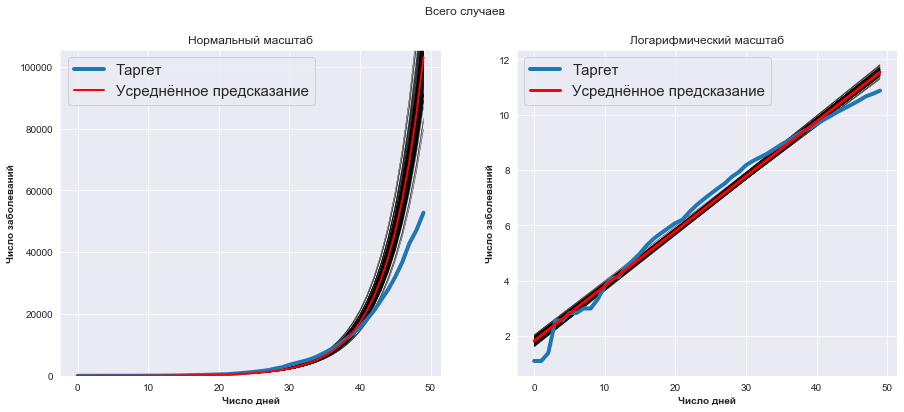

In [18]:
exponential_sampling(mu_total.flatten(),
                     sigma_total,
                     x_train,
                     total_train,
                     start=FROM_DATE,
                     n=100,
                     title='Всего случаев')

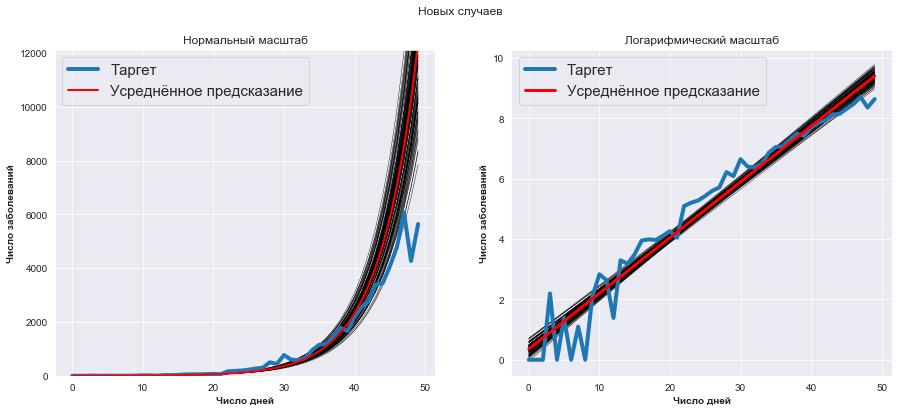

In [19]:
exponential_sampling(mu_new.flatten(),
                     sigma_new,
                     x_train,
                     new_train,
                     start=FROM_DATE,
                     n=100,
                     title='Новых случаев')

### Посмотрим результаты на ключевые даты: 1 мая, 1 июня, 1 сентября:

Результат для ввыбранной даты
2020-05-01: Реальное 114431.0, предсказанное 731776
2020-06-01: Реальное 414328.0, предсказанное 342967534
2020-09-01: Реальное 997072.0, предсказанное 30510082497530032



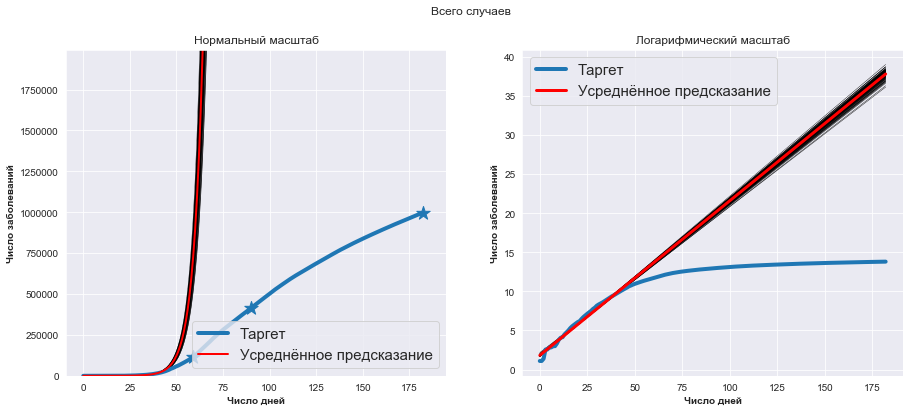

In [20]:
exponential_sampling(mu_total.flatten(),
                     sigma_total,
                     np.arange(len(total_cases)).reshape(-1, 1),
                     total_cases, start=FROM_DATE,
                     n=100,
                     title='Всего случаев',
                     points=[OFFSETS, total_cases[OFFSETS]]);

Результат для ввыбранной даты
2020-05-01: Реальное 7933.0, предсказанное 81759
2020-06-01: Реальное 8485.0, предсказанное 27566341
2020-09-01: Реальное 4670.0, предсказанное 1058246828889921



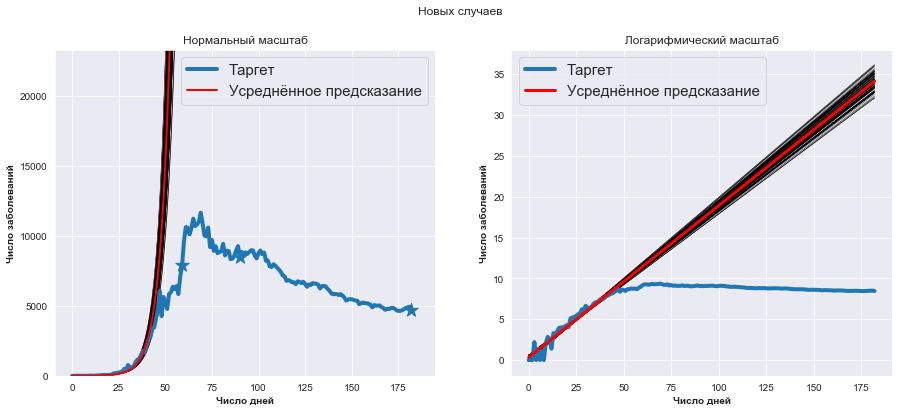

In [21]:
exponential_sampling(mu_new.flatten(),
                     sigma_new,
                     np.arange(len(new_cases)).reshape(-1, 1),
                     new_cases,
                     start=FROM_DATE, 
                     n=100,
                     title='Новых случаев',
                     points=[OFFSETS, new_cases[OFFSETS]]);

Экспоненциальная модель очень завышено оценивает число заболевших, в реальности количество случаев заражения вирусом перестает так быстро расти и имеет конечную верхнюю границу.

## Сигмоидальная модель

Теперь воспользуемся другой функцией для прогнозирования случаев заражения вирусами:

$\Phi(x) = \dfrac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{-t^2 / 2} dt.$

Эта функция является кумулятивной функцией гауссова распределения. Быстрый рост и насыщение функции должны делать эту 
Однако с его верхней границей надо как-то разобраться: в реальной жизни количество заражений может меняться от нуля до некоторого числа $ \alpha $ - максимально возможное количество заражений. Следовательно, целевую переменную $ y $ разумно прогнозировать как
$y = \alpha \ \Phi(\dfrac{x - \mu}{\sigma}), $ здесь $\ \mu, \sigma, \alpha \ -$ параметры модели.

Данную модель можно предскавить в эквивалентном виде:

$y = \int_{-\infty}^{x} e^{w_0 + w_1 t + w_2 t^2} dt,$

Взятие производной и дифференцирование приводит к виду:

$\log(\dfrac{dy}{dx}) = w_0 + w_1 x + w_2 x^2,$

Данное представление позволит использовать модель линейной регрессии, ведь в данном выражении $y$ - число новых случаев, $x$ - число дней.


In [22]:
diff_train = np.diff(data['total_cases'][:TRAIN_SIZE + 1].values)
diff_train[diff_train == 0] = 1

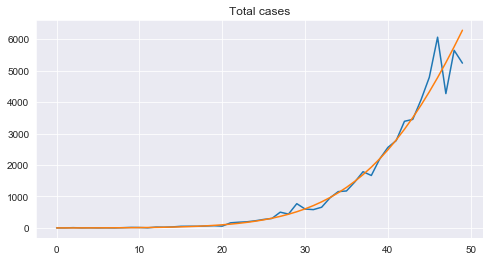

In [23]:
x_train_sigmoid = np.c_[np.arange(TRAIN_SIZE), np.arange(TRAIN_SIZE)**2]

sigmoid_model = LinearRegression()
sigmoid_model.fit(x_train_sigmoid, np.log(diff_train))

plt.figure(figsize=(8, 4))
plt.plot(diff_train)
plt.plot(np.exp(sigmoid_model.predict(x_train_sigmoid)))
plt.title("Total cases");

In [24]:
sigma_noise_sigmoid = np.std(np.log(diff_train) - sigmoid_model.predict(x_train_sigmoid))
print(f'Стандартное отклонение: {sigma_noise_sigmoid}')

Стандартное отклонение: 0.4861146977873167


Возьмём некоторые априорные параметры:

In [25]:
mu_0 = np.random.randn(3)
sigma_0 = 100. * np.identity(3)

mu_sigmoid, sigma_sigmoid = bayesian_update(mu_0, sigma_0, x_train_sigmoid, np.log(diff_train), sigma_noise_sigmoid)

In [26]:
def sigmoidal_sampling(mu, sigma, n_days, n=20, total_cases=total_cases, new_cases=new_cases):
    x = np.arange(n_days)
    my_w = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    res_total = []
    res_new = []
    for w in my_w:
        pred = np.exp(w[0] + w[1] * x + w[2] * x**2)
        total = np.cumsum(pred)
        ax[0].plot(x, total, 'k-', lw=.4)
        res_total.append(total)
        ax[1].plot(x, pred, 'k-', lw=.4)
        res_new.append(pred)
        
    ax[0].set_title('Всего случаев')
    ax[0].plot(x, total_cases[:n_days], linewidth=5, label="Таргет")
    ax[0].plot(x, np.mean(res_total, axis=0), linewidth=2, label="Усреднённое предсказание", color="red")
    ax[0].set_ylim((0, min(2 * max(total_cases[:n_days]), 2 * max(np.mean(res_total, axis=0)))))
    ax[0].set_xlabel('Число дней', weight='bold')
    ax[0].set_ylabel('Число заболевших', weight='bold')
    ax[0].legend(fontsize=15)
    ax[1].set_title('Новых случаев')
    ax[1].plot(x, new_cases[:n_days], linewidth=5, label="Таргет")
    ax[1].plot(x, np.mean(res_new, axis=0), linewidth=3, label="Усреднённое предсказание", color="red")
    ax[1].set_ylim((0, min(2 * max(new_cases[:n_days]), 2 * max(np.mean(res_new, axis=0)))))
    ax[1].set_xlabel('Число дней', weight='bold')
    ax[1].set_ylabel('Число заболевших', weight='bold')
    ax[1].legend(fontsize=15)

In [27]:
def sigmoidal_sampling_with_dates(mu, sigma, n_days, start, n, points, total_cases=total_cases, new_cases=new_cases):
    x = np.arange(n_days)
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res_total = []
    res_new = []
    plt.figure(figsize=(14, 8))
    for w in my_w:
        pred = np.exp(w[0] + w[1] * x + w[2] * x**2)
        total = np.cumsum(pred)
        plt.plot(x, total, 'k-', lw=.4)
        res_total.append(total)
        res_new.append(pred)
    
    medians = np.median(res_total, axis=0)
    pred_10_proc = np.percentile(res_total, q=10, axis=0)
    pred_90_proc = np.percentile(res_total, q=90, axis=0)
    text = 'Всего случаев на выбранные даты\n\n'
    dates = [(pd.to_datetime(start) + pd.DateOffset(days=p)).date() for p in points]
    for date, true, med, p10, p90 in zip(dates, total_cases[points], medians[points], pred_10_proc[points], pred_90_proc[points]):
        text += f'{date}:\nРельное число: {true}\nМедианное предсказание: {int(med)}\nПредсказание плохого сценария (90-перцентиль): {int(p90)}\n' + \
                f'Предсказание для хорошего сценария (10-перцентиль): {int(p10)}\n\n'
    print(text)
    plt.scatter(points, total_cases[points], marker='*', s=200)
    plt.plot(x, total_cases[:n_days], linewidth=6, label="Таргет")
    plt.plot(x, medians, linewidth=4, label="Медианное предсказание", color="red")
    plt.plot(x, pred_10_proc, linewidth=4, label="10-ый перцентиль выборочных преджсказаний")
    plt.plot(x, pred_90_proc, linewidth=4, label="90-ый перцентиль выборочных преджсказаний")
    plt.ylim((0, min(2 * max(total_cases[:n_days]), 1.1 * max(pred_90_proc))))
    plt.xlabel('Число дней', weight='bold')
    plt.ylabel('Число заболевших', weight='bold')
    plt.legend(fontsize=15)
    plt.show()
    
    plt.figure(figsize=(14, 8))
    for r in res_new:
        plt.plot(x, r, 'k-', lw=.4)
    medians = np.median(res_new, axis=0)
    pred_10_proc = np.percentile(res_new, q=10, axis=0)
    pred_90_proc = np.percentile(res_new, q=90, axis=0)
    text = 'Всего случаев на выбранные даты\n\n'
    for date, true, med, p10, p90 in zip(KEY_DATES, new_cases[points], medians[points], pred_10_proc[points], pred_90_proc[points]):
        text += f'{date}:\nРельное число: {true}\nМедианное предсказание: {int(med)}\nПредсказание плохого сценария (90-перцентиль): {int(p90)}\n' + \
                f'Предсказание для хорошего сценария (10-перцентиль): {int(p10)}\n\n'
    print(text)
    plt.scatter(points, new_cases[points], marker='*', s=200)
    plt.plot(x, new_cases[:n_days], linewidth=6, label="Target")
    plt.plot(x, medians, linewidth=4, label="Медианное предсказание", color="red")
    plt.plot(x, pred_10_proc, linewidth=4, label="10-ый перцентиль выборочных преджсказаний")
    plt.plot(x, pred_90_proc, linewidth=4, label="90-ый перцентиль выборочных преджсказаний")
    plt.ylim((0, min(2 * max(new_cases[:n_days]), 1.1 * max(pred_90_proc))))
    plt.xlabel('Число дней', weight='bold')
    plt.ylabel('Число заболевших', weight='bold')
    plt.legend(fontsize=15)

### Рассмотрим графики предсказаний сигмоидальной модели:

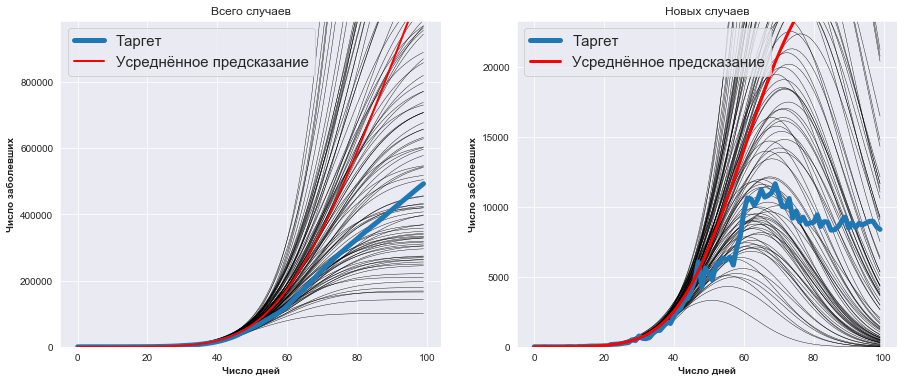

In [28]:
sigmoidal_sampling(mu_sigmoid.flatten(), sigma_sigmoid, n_days=100, n=100)

Всего случаев на выбранные даты

2020-05-01:
Рельное число: 114431.0
Медианное предсказание: 157893
Предсказание плохого сценария (90-перцентиль): 204136
Предсказание для хорошего сценария (10-перцентиль): 117903

2020-06-01:
Рельное число: 414328.0
Медианное предсказание: 610724
Предсказание плохого сценария (90-перцентиль): 1591478
Предсказание для хорошего сценария (10-перцентиль): 269205

2020-09-01:
Рельное число: 997072.0
Медианное предсказание: 695190
Предсказание плохого сценария (90-перцентиль): 2711295
Предсказание для хорошего сценария (10-перцентиль): 276187




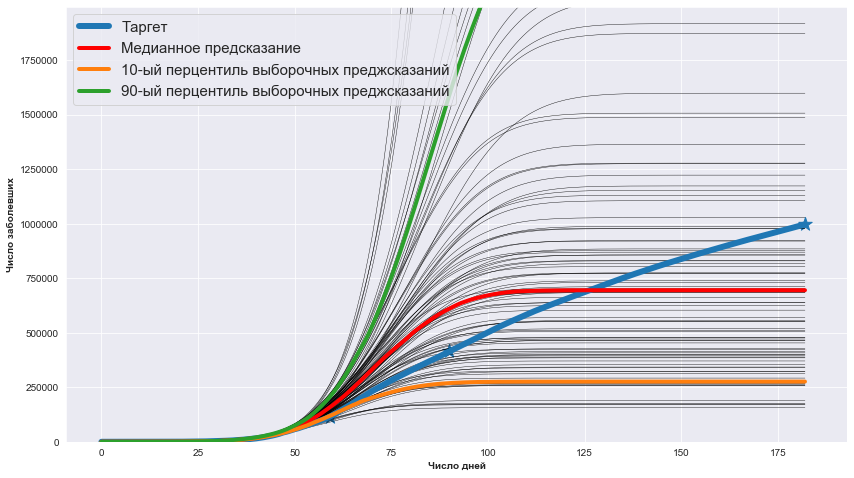

Всего случаев на выбранные даты

2020-05-01:
Рельное число: 7933.0
Медианное предсказание: 12866
Предсказание плохого сценария (90-перцентиль): 19997
Предсказание для хорошего сценария (10-перцентиль): 7505

2020-06-01:
Рельное число: 8485.0
Медианное предсказание: 9676
Предсказание плохого сценария (90-перцентиль): 57399
Предсказание для хорошего сценария (10-перцентиль): 1256

2020-09-01:
Рельное число: 4670.0
Медианное предсказание: 0
Предсказание плохого сценария (90-перцентиль): 0
Предсказание для хорошего сценария (10-перцентиль): 0




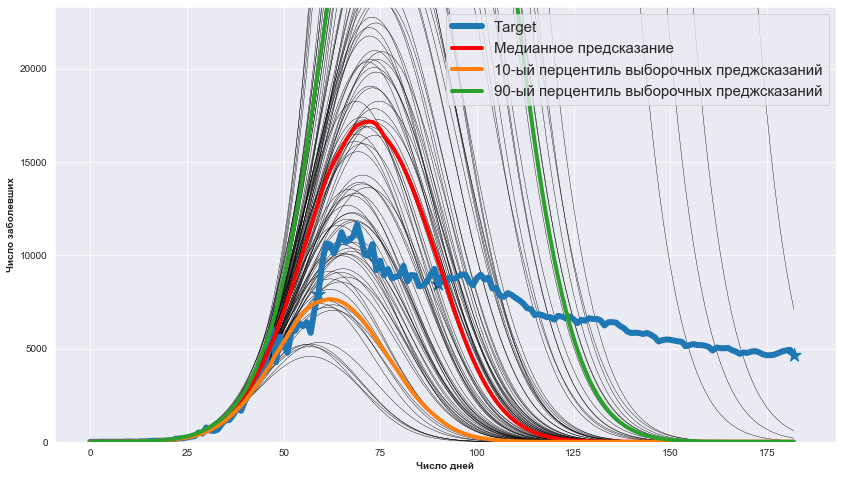

In [29]:
sigmoidal_sampling_with_dates(mu_sigmoid.flatten(),
                              sigma_sigmoid,
                              n_days=183,
                              start=FROM_DATE,
                              n=100,
                              points=OFFSETS)


## Рассмотрим другую страну

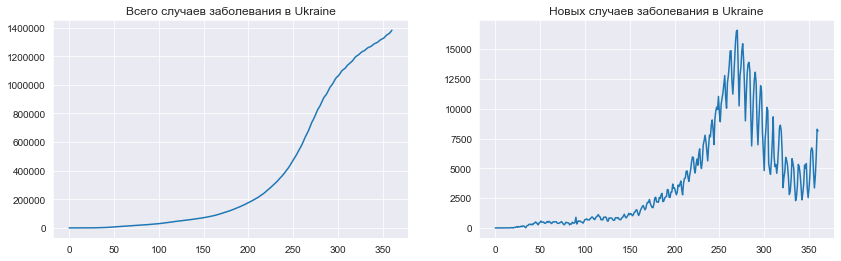

In [30]:
data = pd.read_csv('owid-covid-data.csv')

data = data[['date', 'location', 'total_cases', 'new_cases']].dropna()
data['date'] = pd.to_datetime(data['date'])

COUNTRY = 'Ukraine'
data_other = data.loc[data['location'] == COUNTRY]
data_other = data_other[:].reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(data_other['total_cases'].values)
ax[0].set_title(f"Всего случаев заболевания в {COUNTRY}")
ax[1].plot(data_other['new_cases'].values)
ax[1].set_title(f"Новых случаев заболевания в {COUNTRY}");

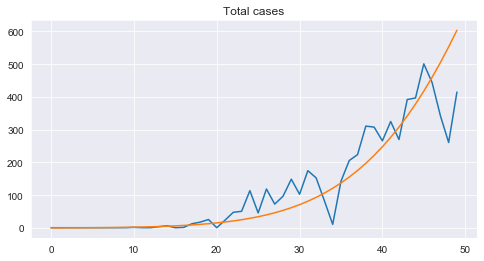

In [31]:
TRAIN_SIZE = 50

x_other = np.c_[np.arange(TRAIN_SIZE), np.arange(TRAIN_SIZE)**2]
new_other = data_other['new_cases'].values
new_other[new_other == 0] = 1
other_train = new_other[:TRAIN_SIZE]
model_other = LinearRegression()
model_other.fit(x_other, np.log(other_train))

plt.figure(figsize=(8, 4))
plt.plot(other_train)
plt.plot(np.exp(model_other.predict(x_other)))
plt.title("Total cases");

In [32]:
sigma_other = np.std(np.log(other_train) - model_other.predict(x_other))
mu_other, sigma_other = bayesian_update(mu_0, sigma_0, x_other, np.log(other_train), sigma_other)

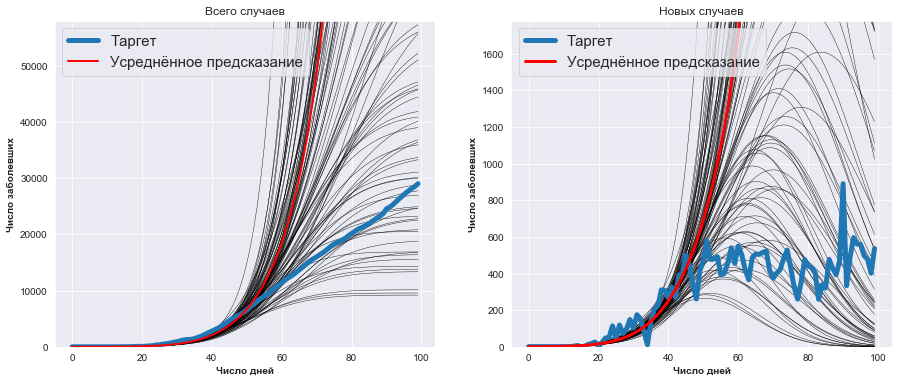

In [33]:
sigmoidal_sampling(mu_other.flatten(),
                   sigma_other,
                   n_days=100,
                   n=100,
                   total_cases=data_other['total_cases'].values,
                   new_cases=data_other['new_cases'].values)

Всего случаев на выбранные даты

2020-05-01:
Рельное число: 10861.0
Медианное предсказание: 15660
Предсказание плохого сценария (90-перцентиль): 25836
Предсказание для хорошего сценария (10-перцентиль): 9473

2020-06-01:
Рельное число: 24562.0
Медианное предсказание: 81154
Предсказание плохого сценария (90-перцентиль): 596087
Предсказание для хорошего сценария (10-перцентиль): 20288

2020-09-01:
Рельное число: 126279.0
Медианное предсказание: 115828
Предсказание плохого сценария (90-перцентиль): 14251002
Предсказание для хорошего сценария (10-перцентиль): 20719




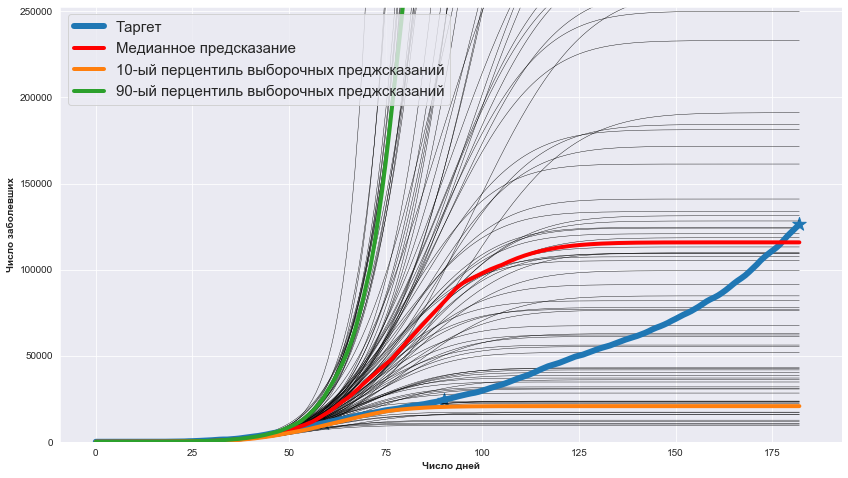

Всего случаев на выбранные даты

2020-05-01:
Рельное число: 455.0
Медианное предсказание: 1298
Предсказание плохого сценария (90-перцентиль): 2907
Предсказание для хорошего сценария (10-перцентиль): 539

2020-06-01:
Рельное число: 890.0
Медианное предсказание: 2123
Предсказание плохого сценария (90-перцентиль): 42759
Предсказание для хорошего сценария (10-перцентиль): 68

2020-09-01:
Рельное число: 2147.0
Медианное предсказание: 0
Предсказание плохого сценария (90-перцентиль): 71174
Предсказание для хорошего сценария (10-перцентиль): 0




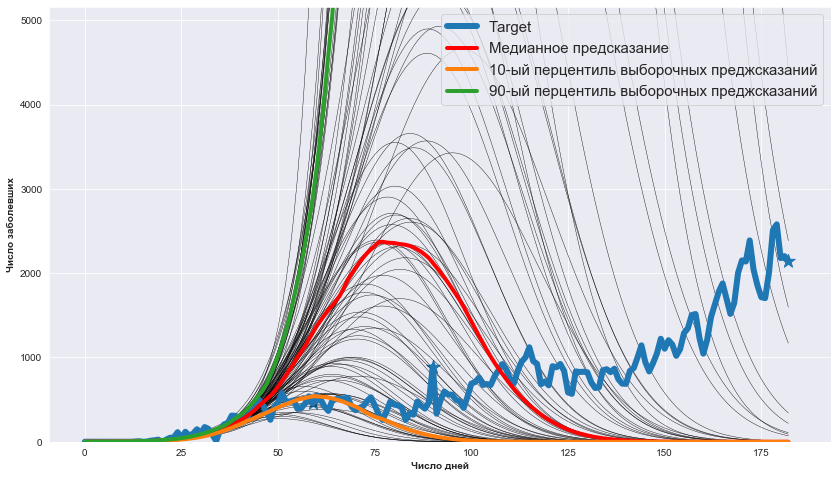

In [34]:
sigmoidal_sampling_with_dates(mu_other.flatten(),
                              sigma_other,
                              n_days=183,
                              start=data_other['date'][0].date(),
                              n=100,
                              points=OFFSETS, 
                              total_cases=data_other['total_cases'].values,
                              new_cases=data_other['new_cases'].values)

Апостериорные параметры похожи, но провести полный анализ сложно из-за разной скорости распространения вируса, это иногда приводит к случаям, когда сигмоидальная модель не может правильно предсказать даже через 10 дней после обучения через 50 дней.

Апостериорные параметры похожи, но хороший анализ провести затруднительно, ведь скорость распространения вируса и начало эпидемии отличаются в разных странах и даже сигмоидальная модель не может с достаточной точностью предсказывать даже ближайшее будущее (несколько дней).

Сигмоидальная модель хорошо показывает себя для предсказания распространения заболевания ковидом (процесс со стадией быстрого роста и насыщения). Моделирование эпидемии сложная задача, но использование сигмоидальной модели для прогнозирования числа заболеваний на раннем этапе вполне возможно.

Так как случаи заболеваемости приходят с задержкой (инкубационный период), то достаточно сложно предсказывать точное начало карантина, но на начальных этапах его распространения сигмоидальная модель будет хорошим выбором для принятия такого решения. Также стоит отметить, что моделирование новых случаев заражение разумно делать с помощью смеси гауссианов, так как заболеваемость происходит "волнами".